In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("compresive_strength_concrete.csv")
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
df.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [5]:
X = df.drop('Concrete compressive strength(MPa, megapascals) ', axis = 1)
y = df['Concrete compressive strength(MPa, megapascals) ']

In [6]:
# Split the data into train, validation & test sets
train_split = round(0.5 * len(df)) # 50% of data
valid_split = round(train_split + 0.2 * len(df)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]


In [7]:
# normalization
mean = X_train.mean(axis=0)
X_train -= mean

std = X_train.std(axis=0)

X_train /= std
X_test -= mean
X_test /= std
X_valid -= mean
X_valid /= std

In [8]:
# normalization
mean = y_train.mean(axis=0)
y_train -= mean

std = y_train.std(axis=0)

y_train /= std
y_test -= mean
y_test /= std
y_valid -= mean
y_valid /= std

In [9]:
import tensorflow as tf
partial_x_valid = tf.constant(X_valid)
partial_x_train = tf.constant(X_train)
partial_y_train = tf.constant(X_train)
partial_y_valid = tf.constant(X_valid)

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu', input_shape=(partial_x_train.shape[1],)))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [11]:
model = build_model()
history = model.fit(partial_x_train, partial_y_train,
                    validation_data=(partial_x_valid, partial_y_valid),
                    epochs=100, batch_size=1, verbose=0)
mae_history = history.history['val_mae']


In [12]:
mae_history

[0.8878774642944336,
 0.8859683871269226,
 0.8683797121047974,
 0.8795918822288513,
 0.8722708821296692,
 0.8738518357276917,
 0.8740240335464478,
 0.8713421821594238,
 0.8702448606491089,
 0.8726751208305359,
 0.8753817081451416,
 0.8799605369567871,
 0.869244396686554,
 0.8735486268997192,
 0.8757812976837158,
 0.8693141937255859,
 0.8694534301757812,
 0.8721227645874023,
 0.866851806640625,
 0.868945837020874,
 0.8719075322151184,
 0.8693905472755432,
 0.8712313771247864,
 0.8680683374404907,
 0.8670589327812195,
 0.8666257262229919,
 0.8684781789779663,
 0.8690546751022339,
 0.8662380576133728,
 0.8691833019256592,
 0.8703745603561401,
 0.8664413094520569,
 0.8642193675041199,
 0.8662204146385193,
 0.8671393394470215,
 0.8680750131607056,
 0.8676391243934631,
 0.8691104650497437,
 0.8643842339515686,
 0.8645333051681519,
 0.8662763237953186,
 0.8689438104629517,
 0.865649402141571,
 0.8665105104446411,
 0.8694900274276733,
 0.8647028207778931,
 0.8678533434867859,
 0.86619836091995

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

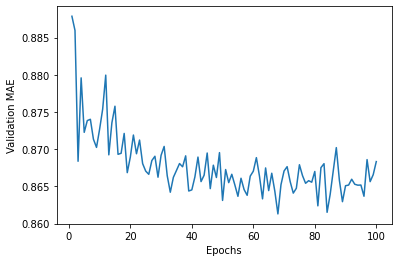

In [14]:
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [17]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(8, activation='relu', input_shape=(partial_x_train.shape[1],)))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model
model = build_model()
history = model.fit(partial_x_train, partial_y_train,
                    validation_data=(partial_x_valid, partial_y_valid),
                    epochs=35, batch_size=1, verbose=0)
mae_history = history.history['val_mae']    

In [18]:
mae_history

[0.8686673641204834,
 0.877159833908081,
 0.8792117238044739,
 0.8864538669586182,
 0.8820332884788513,
 0.8757862448692322,
 0.8793349266052246,
 0.8830559849739075,
 0.8764697909355164,
 0.8794478178024292,
 0.8736382126808167,
 0.8781588077545166,
 0.8773476481437683,
 0.8719675540924072,
 0.8735760450363159,
 0.8726176023483276,
 0.8762320876121521,
 0.8722437620162964,
 0.8700237274169922,
 0.8722726106643677,
 0.8671906590461731,
 0.8681725859642029,
 0.8662648797035217,
 0.8752112984657288,
 0.8664340972900391,
 0.8650124073028564,
 0.8737872838973999,
 0.8707988858222961,
 0.8715081810951233,
 0.8677355647087097,
 0.8689035177230835,
 0.8656086325645447,
 0.8685303330421448,
 0.866675078868866,
 0.86586993932724]

In [20]:
test_mse, test_mae = model.evaluate(X_test, y_test, verbose=0)

In [21]:
test_mse, test_mae

(0.8526333570480347, 0.7583510279655457)

In [22]:
model.predict(X_test)

array([[-0.2567936 ],
       [-0.25403175],
       [-0.23953229],
       [-0.14119902],
       [-0.09495074],
       [-0.23960346],
       [-0.23447084],
       [-0.20752436],
       [-0.1102192 ],
       [-0.0654562 ],
       [-0.22222619],
       [-0.21709353],
       [-0.18667646],
       [-0.05688104],
       [ 0.00829124],
       [-0.20133896],
       [-0.18349762],
       [-0.18914755],
       [-0.16301057],
       [-0.24728127],
       [-0.20875387],
       [-0.19483417],
       [-0.18581761],
       [-0.19136925],
       [-0.16443564],
       [-0.15931673],
       [-0.15979388],
       [-0.1607482 ],
       [-0.15762806],
       [-0.14412798],
       [-0.16982749],
       [-0.17149755],
       [-0.17105035],
       [-0.09490217],
       [ 0.08648394],
       [ 0.18570758],
       [-0.26602137],
       [-0.25096944],
       [-0.22107238],
       [-0.18971464],
       [-0.19260873],
       [-0.01784888],
       [-0.23996523],
       [-0.23735394],
       [-0.2321313 ],
       [-0